# Physics 300 
## Computational Physics I (Fall 2018)
## BPB-248, Mon/Wed 02:30 - 03:45 pm 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Mon/Wed 03:45 - 05:00 pm |


# 16 Local Optmization (II)

## 16.1 Gradient descent on 2D


Let's continue our journey in optimization. If we extend the gradient descent algorithm to two-variables system. How shall we implements it.

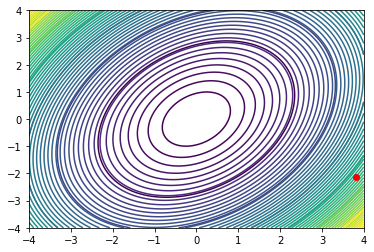

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f1(x): #simple function with 1 minimum
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4 # + 3* np.exp(-x[0]**2)

def f2(x): #complex function with 2 minimum
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4 + 3* np.exp(-x[0]**2)
    #return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

#def f2(x):
#    p = np.exp(-(x[0]/4-x[1]/1)**2)
#    return p

def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

x_min, x_max = -4, 4
y_min, y_max = -4, 4                   

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z = f1([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)


x0, y0 = init(x_min, x_max, y_min, y_max)
plt.plot(x0, y0, 'ro')
plt.show()


### 16.2 Gradient descent with fixed step size

In [26]:
# variable stepwidth
def derivative2(f, xy, d=0.001):
    x, y = xy[0], xy[1]
    fx = (f([x+d/2,y])-f([x-d/2,y]))/d
    fy = (f([x,y+d/2])-f([x,y-d/2]))/d
    #print(fx,fy)
    return np.array([fx,fy])

def minimize_fix(f,x0, N=1000):
    """
    x0: 1*2 array
    """
    
    x_now = x0
    converged = False
    x_hist = []
    x_hist.append(x_now)
    dx = 0.05

    for i in range(N):
        
        df_now = derivative2(f, x_now) 
        x_next = x_now - df_now*dx
        
        #print("step:    ", f(x_now), f(x_next))
        if f(x_next)>f(x_now):
            converged = True
            break
        else:
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)

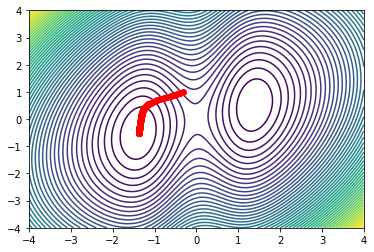

results of f_min:  1.309621667487469   number of iterations:   523
[-0.32735493  0.99942598] 3.163465539223354
[-1.3748453  -0.51556693] 1.309621667487469


In [27]:
[x0, y0] = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize_fix(f2, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f2([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()
print('results of f_min: ', f_min, '  number of iterations:  ', len(x_hist))
print(x_hist[0], f2(x_hist[0]))
print(x_hist[-1], f2(x_hist[-1]))


### 16.3 Gradient descent with variable step size

In [28]:
def minimize_var(f,x0, N=1000):
    """
    x0: 1*2 array
    """
    
    x_now = x0
    x_prev = None
    converged = False
    x_hist = []
    x_hist.append(x_now)
    for i in range(N):
        
        df_now = derivative2(f2, x_now) 
        
        if x_prev is None:
            dx = 0.01
        else:
            df_prev = derivative2(f2, x_prev)
            dd = df_now - df_prev
            dx = np.dot(x_now - x_prev, dd) / (np.linalg.norm(dd))**2
        x_next = x_now - df_now*dx
        
        print("step:    ", f(x_now), f(x_next))
        if f(x_next)>f(x_now):
            converged = True
            break
        else:
            x_prev = x_now
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)

step:     1.9415649866457976 1.9053787549360552
step:     1.9053787549360552 1.416781007989666
step:     1.416781007989666 1.3430759476795688
step:     1.3430759476795688 1.3306530225732494
step:     1.3306530225732494 1.3112957239426168
step:     1.3112957239426168 1.309832127327142
step:     1.309832127327142 1.3106221033088452


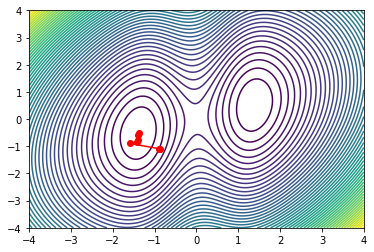

results of f_min:  1.309832127327142   number of iterations:   7
[-0.87335979 -1.0958936 ] 1.9415649866457976
[-1.36404411 -0.517051  ] 1.309832127327142


In [29]:
[x0, y0] = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize_var(f2, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f2([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()
print('results of f_min: ', f_min, '  number of iterations:  ', len(x_hist))
print(x_hist[0], f2(x_hist[0]))
print(x_hist[-1], f2(x_hist[-1]))


step:     5.6384390008027045 5.5137075864392635
step:     5.5137075864392635 0.05539538682548397
step:     0.05539538682548397 0.42721374583428035


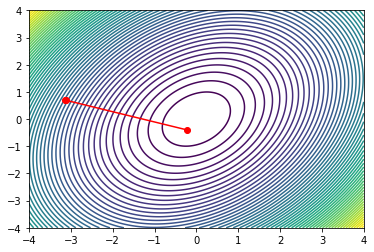

results of f_min:  0.05539538682548397   number of iterations:   3
[-3.13862384  0.70029303] 5.6384390008027045
[-0.21732073 -0.40084647] 0.05539538682548397


In [34]:
[x0, y0] = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize_var(f1, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f1([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()
print('results of f_min: ', f_min, '  number of iterations:  ', len(x_hist))
print(x_hist[0], f1(x_hist[0]))
print(x_hist[-1], f1(x_hist[-1]))

## 16.4 Other methods
### 16.4.1 Conjungate Gradient
As you have seen in the gradient descent method the algorihtm makes steps in same direction several times. 
$$ d_0 = \gamma \nabla f(x_0)$$

Here’s an idea: let’s pick a set of orthoginal search directions so that if we take exactly one step of right length in each of those directions we will reach the minimum. In order to rectify this, we require that our directions be conjugate to one another.

$$ d_1 = \nabla f(x_1) + \beta_0d_0$$

See more details in [Wikipedia](https://en.wikipedia.org/wiki/Conjugate_gradient_method)


## 16.5 Minimization Packages in Scipy


In [45]:
from scipy.optimize import minimize

[x0, y0] = init(x_min, x_max, y_min, y_max)
res = minimize(f2, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 1.309622
         Iterations: 43
         Function evaluations: 83


In [48]:
res = minimize(f2, [x0,y0], method='CG', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 1.309622
         Iterations: 9
         Function evaluations: 60
         Gradient evaluations: 15


In [49]:
res = minimize(f2, [x0,y0], method='BFGS', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 1.309622
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 6


In [50]:
res = minimize(f2, [x0,y0], method='powell', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 1.309622
         Iterations: 3
         Function evaluations: 91


## 16.6 Homework

Write a program to find the minium of 
    $$ f(x,y) = x^2/2 + y^2/3 - xy/4 $$
    
- 1, from your own code (except Monte Carlo)
- 2, from scipy

## 16.6 Project:
- 1. explain the following three methods:
    - gradient descent
    - conjungate gradient
    - quasi newton
- 2, discuss how it performs on quadratic functions and other functions 
- 3, write your own codes and apply them to solve the optimization problems in f(x, y)

